In [1]:
%load_ext autoreload
%autoreload

'''

In [2]:
import numpy as np
from mres import wv_pipeline, plot_fixed_results, plot_against_tau
import matplotlib.pyplot as plt

In [3]:
generator = np.random.default_rng()

In [18]:
params = {
    'omega_as': None,
    'omega_a_0': None,
    'omega_f': 1,
    'g': 1,
    'i': np.array([0,0,1]),
    'f': np.array([1,0,0]),
    'm': np.array([1,-1j,0])/2,
    't': None,
    'tau': 0,
    'gamma': 0,
    'm_to_int': False,
    'a': 0,
    'b': 1,
    'rwa': False
}

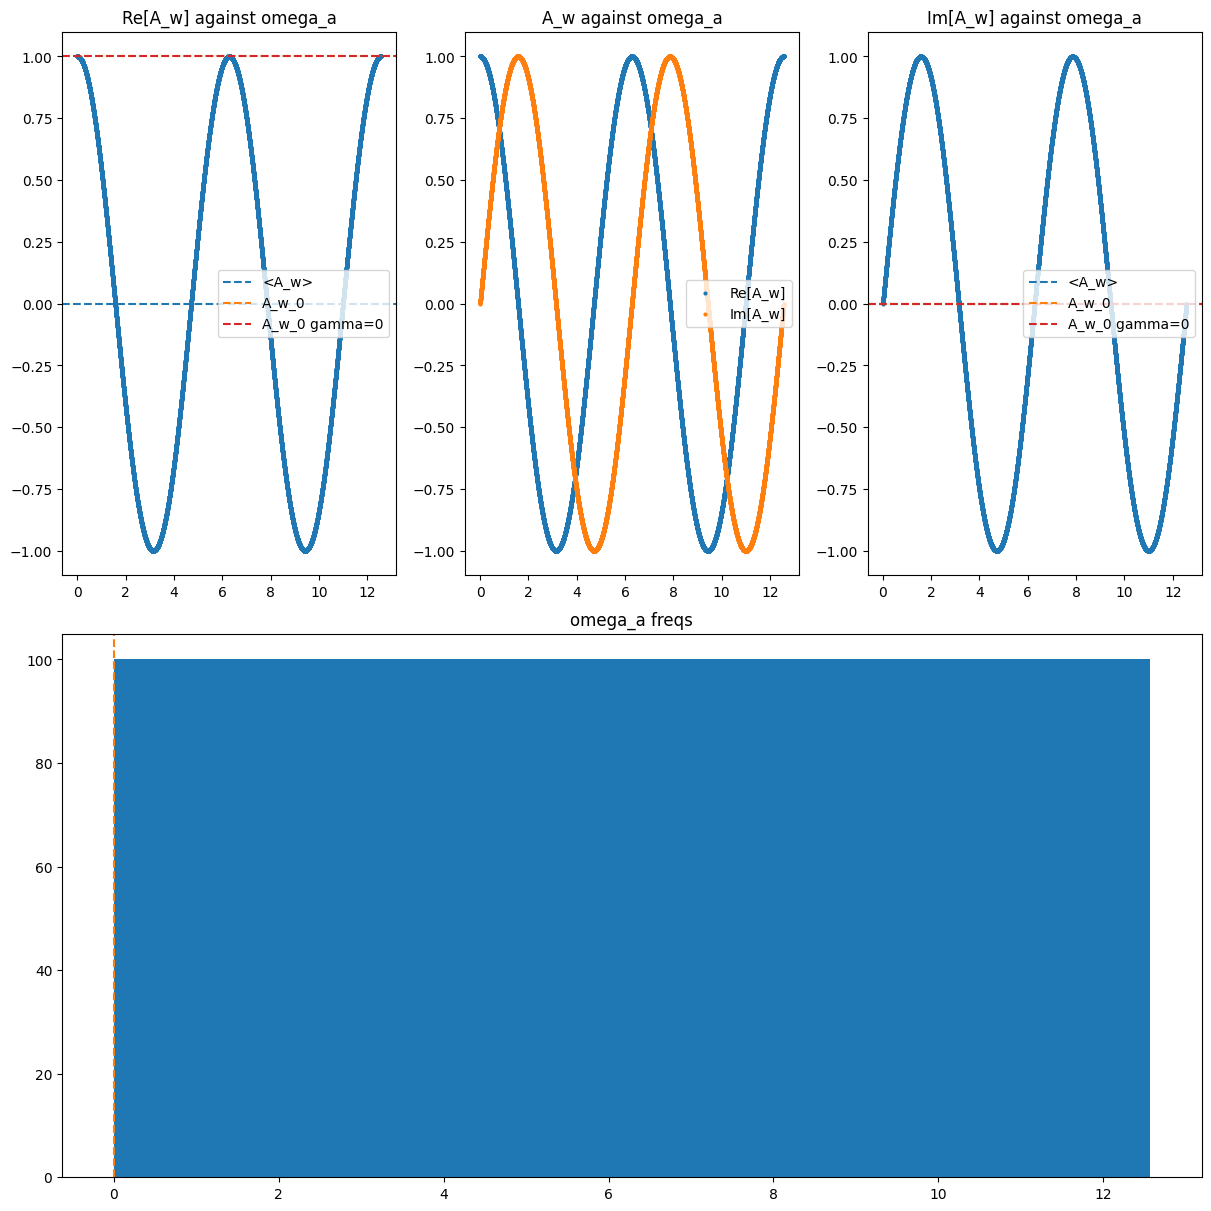

In [19]:
# Across all omega_as

params['omega_as'] = np.linspace(0, 4 * np.pi, 10000)
params['omega_a_0'] = 0 # 2 * np.pi
params['t'] = 1
params['omega_f'] = 1
params['tau'] = 0
params['gamma'] = 0
params['g'] = 1

results = wv_pipeline(params, False)
plot_fixed_results(results)

In [ ]:
# Across all omega_as - big WV!

delta = 1e-4
params['i'] = np.array([np.sin(delta), 0,np.cos(delta)])
params['f'] = np.array([0,0,-1])

params['omega_as'] = np.linspace(0, 4 * np.pi, 10000)
params['omega_a_0'] = 0 # 2 * np.pi
params['t'] = 1
params['omega_f'] = 1
params['tau'] = 0
params['gamma'] = 1
params['g'] = 1

results = wv_pipeline(params, False)
plot_fixed_results(results)

In [ ]:
# Across all omega_as - big negative wv

delta = 1e-4
params['i'] = np.array([np.sin(-delta),0,np.cos(-delta)])
params['f'] = np.array([0,0,-1])

params['omega_as'] = np.linspace(0, 4 * np.pi, 10000)
params['omega_a_0'] = 0 # 2 * np.pi
params['t'] = 1
params['omega_f'] = 1
params['tau'] = 0
params['gamma'] = 1
params['g'] = 1

results = wv_pipeline(params, False)
plot_fixed_results(results)

In [ ]:
# Across all omega_as - big negative imaginary WV!

delta = 1e-4
params['i'] = np.array([0, np.sin(delta),np.cos(delta)])
params['f'] = np.array([0,0,-1])

params['omega_as'] = np.linspace(0, 4 * np.pi, 10000)
params['omega_a_0'] = 0 # 2 * np.pi
params['t'] = 1
params['omega_f'] = 1
params['tau'] = 0
params['gamma'] = 1
params['g'] = 1

results = wv_pipeline(params, False)
plot_fixed_results(results)

In [ ]:
params = {
    'omega_as': None,
    'omega_a_0': None,
    'omega_f': 1,
    'g': 1,
    'i': np.array([0,0,1]),
    'f': np.array([-1,0,0]),
    'm': np.array([1,-1j,0])/2,
    't': None,
    'tau': 0,
    'gamma': 0,
    'a': 0,
    'b': 1
}

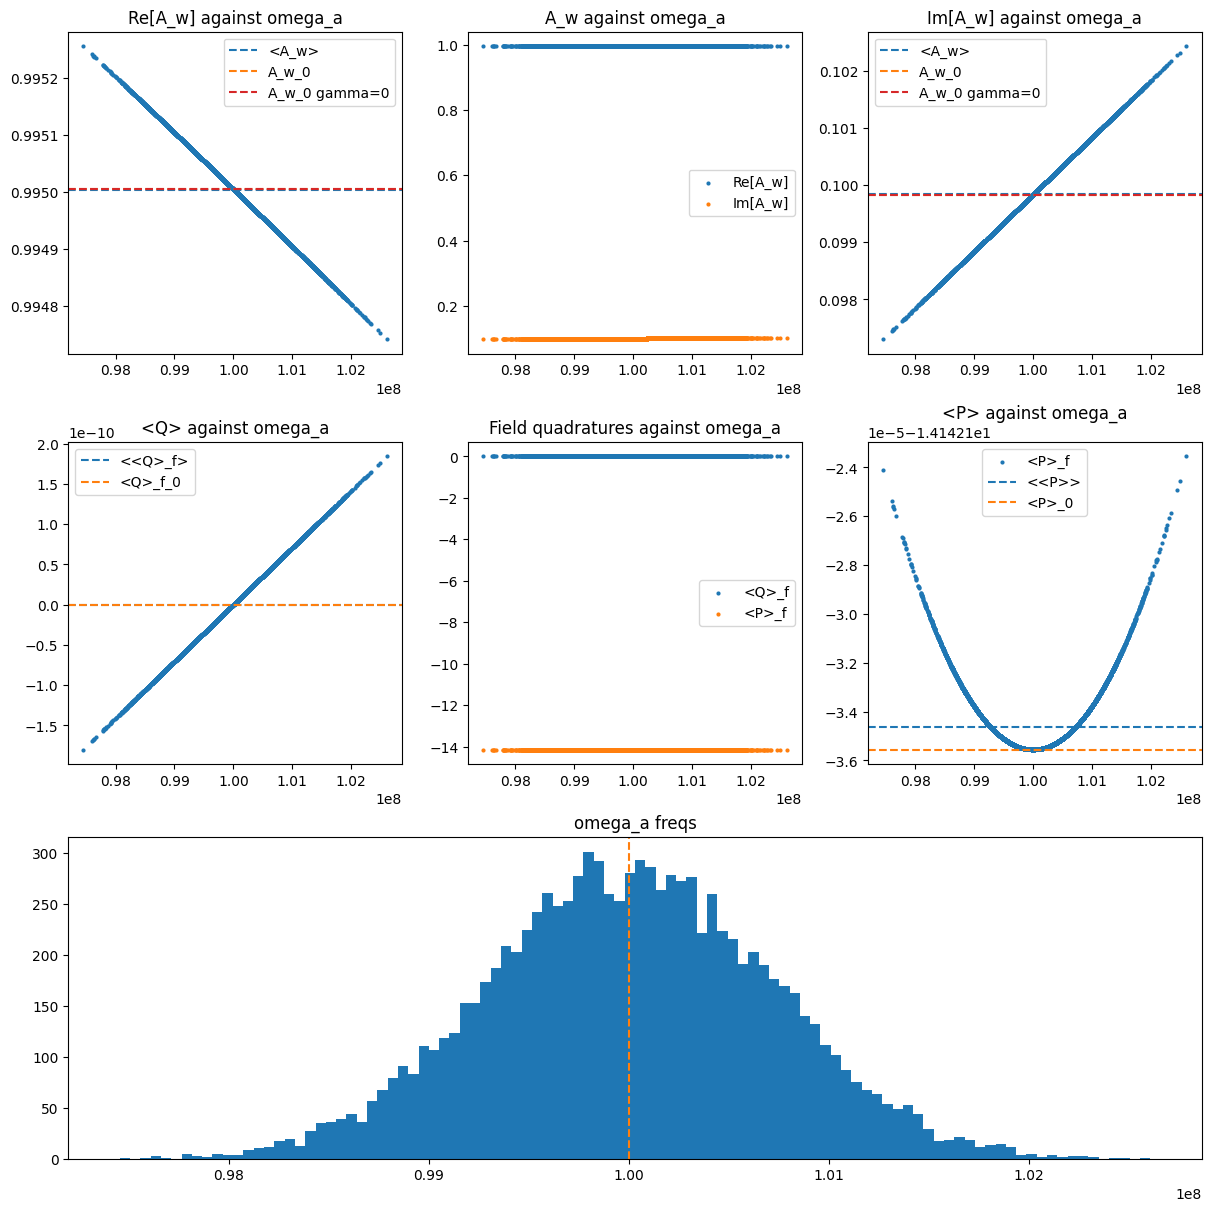

In [15]:
# Gaussian disorder, tau=0

samples = 10000
omega_a_mean = 1e8
omega_a_std = 7e5

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, samples)
params['omega_a_0'] = omega_a_mean
params['t'] = 1e-9
params['tau'] = 0
params['gamma'] = 0
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params)
plot_fixed_results(results)

In [ ]:
plt.scatter(x=results['params']['omega_as'], y=results['wvs'])
plt.axhline(-1)
plt.show()

In [ ]:
results['wvs'][0,0]

In [ ]:
# Gaussian disorder, tau ~ 1/sigma >> t

samples = 10000
omega_a_mean = 1e8
omega_a_std = 1e5
params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, samples)
params['omega_a_0'] = omega_a_mean
params['t'] = 1e-9
params['tau'] = 1e-5
params['gamma'] = 1e-1
params['omega_f'] = 1e9
params['g'] = 1e6

results = wv_pipeline(params)
plot_fixed_results(results)

In [ ]:
-1 * np.exp(1j * omega_a_mean * (params['tau'] + params['t']) - ((params['tau']+params['t'])**2 * omega_a_std**2)/2 - params['gamma'] * params['t']/2)

In [ ]:
results['wv']

In [ ]:
# Gaussian disorder, tau << 1/std
samples = 10000
omega_a_mean = 1e8
omega_a_std = 1e2

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, samples)
params['omega_a_0'] = omega_a_mean
params['t'] = 1e-9
params['tau'] = 1e-5
params['gamma'] = 1e-1
params['omega_f'] = 1e9
params['g'] = 1e6

results = wv_pipeline(params)
plot_fixed_results(results)

In [ ]:
# Gaussian disorder, tau > 1/std
samples = 10000
omega_a_mean = 1e8
omega_a_std = 2e5

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, samples)
params['omega_a_0'] = omega_a_mean
params['t'] = 1e-9
params['tau'] = 1e-5
params['gamma'] = 1e-1
params['omega_f'] = 1e9
params['g'] = 1e6

results = wv_pipeline(params, False)
plot_fixed_results(results)

In [ ]:
# Gaussian disorder, 1/std > tau >> t

samples = 10000
omega_a_mean = 9.993e7
omega_a_std = 3e4
params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, samples)
params['omega_a_0'] = omega_a_mean
params['t'] = 1e-9
params['tau'] = 1e-5
params['gamma'] = 1e-1
params['omega_f'] = 1e9
params['g'] = 1e6

results = wv_pipeline(params)
plot_fixed_results(results)

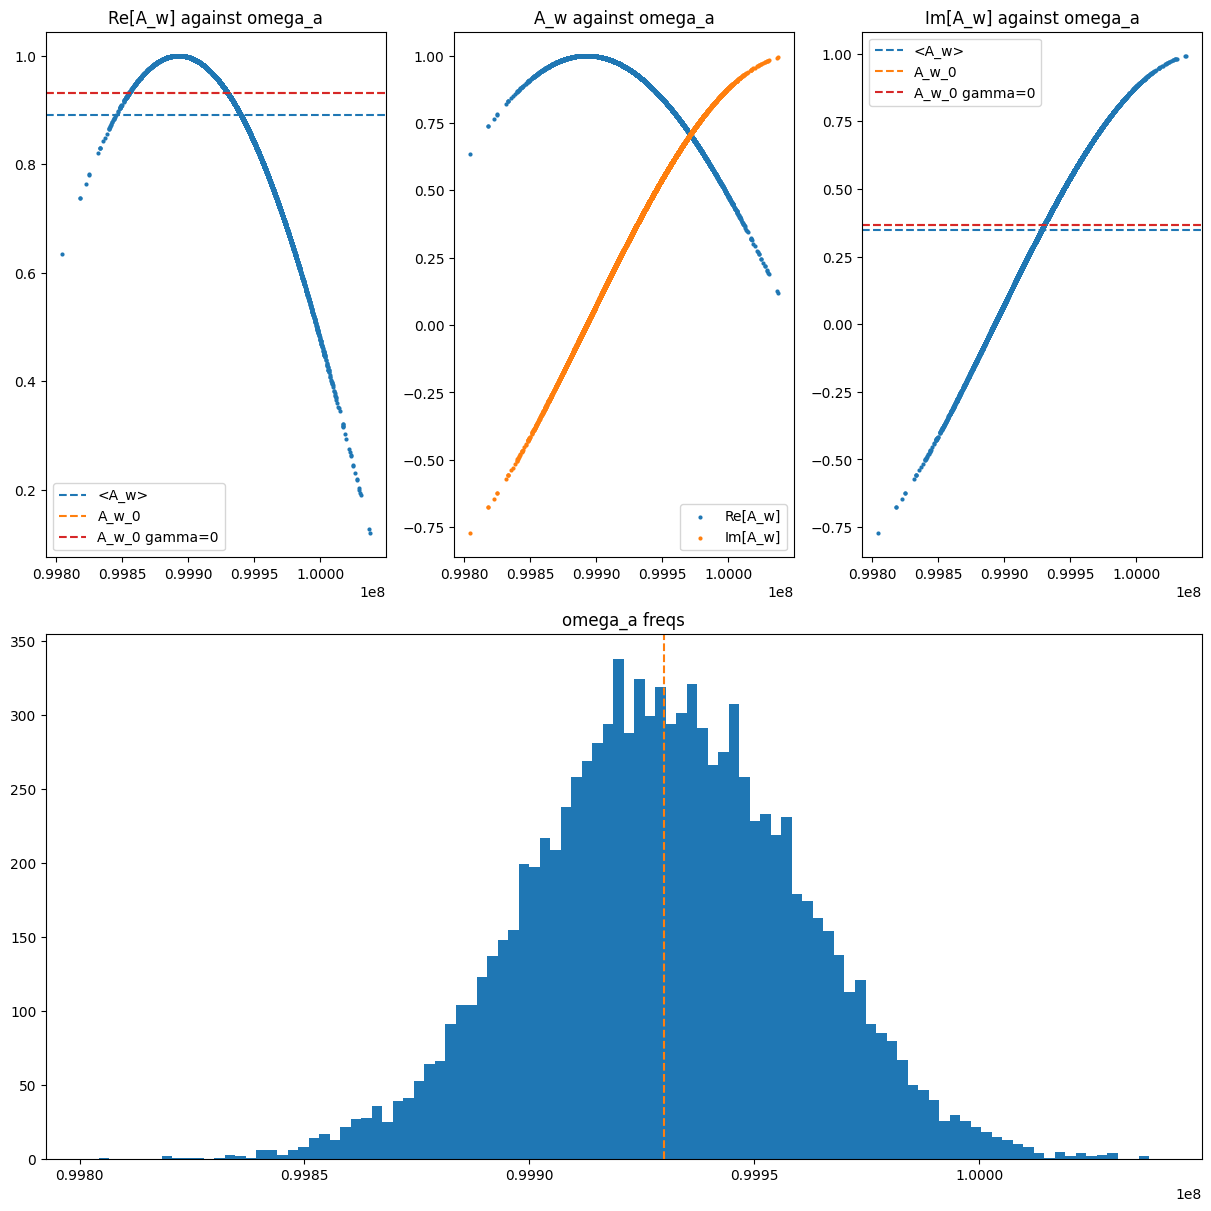

In [21]:
# Constant disorder, tau ~ 1/std >> t
samples = 10000
omega_a_0 = 1e8
omega_a_range = 1e5

omega_a_mean = 9.993e7
omega_a_std = 3e4
params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, samples)
params['omega_a_0'] = omega_a_mean
params['t'] = 1e-9
params['tau'] = 1e-5
params['gamma'] = 1e-1
params['omega_f'] = 1e9
params['g'] = 1e6


results = wv_pipeline(params, False)
plot_fixed_results(results)

In [ ]:
# Constant disorder, tau ~ 1/std >> t
samples = 10000
omega_a_0 = 9.993e7
omega_a_range = 1e5

params['omega_as'] = generator.uniform(omega_a_0-omega_a_range, omega_a_0+omega_a_range, samples)
params['omega_a_0'] = omega_a_0
params['t'] = 1e-9
params['tau'] = 1e-5
params['gamma'] = 1e-1
params['omega_f'] = 1e9
params['g'] = 1e6


results = wv_pipeline(params, False)
plot_fixed_results(results)

In [ ]:
# Gaussian disorder, tau ~ sigma >> t

samples = 10000
omega_a_mean = 1e8
omega_a_std = 1e5
params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, samples)
params['omega_a_0'] = omega_a_mean
params['t'] = 1e-9
params['tau'] = 0.5 / omega_a_std
params['gamma'] = 1
params['omega_f'] = 1e9
params['g'] = 1e6

results = wv_pipeline(params)
plot_fixed_results(results)

In [22]:
delta = 1e-4
params = {
    'omega_as': None,
    'omega_a_0': None,
    'omega_f': 1,
    'g': 1,
    'i': np.array([0,1,0], dtype=np.complex128),
    'f': np.array([0,-np.cos(delta),np.sin(delta)], dtype=np.complex128),
    'm': np.array([1,-1j,0])/2,
    't': None,
    'tau': 0,
    'gamma': 0,
    'm_to_int': False,
    'a': 0,
    'b': 1,
    'rwa': True,
}

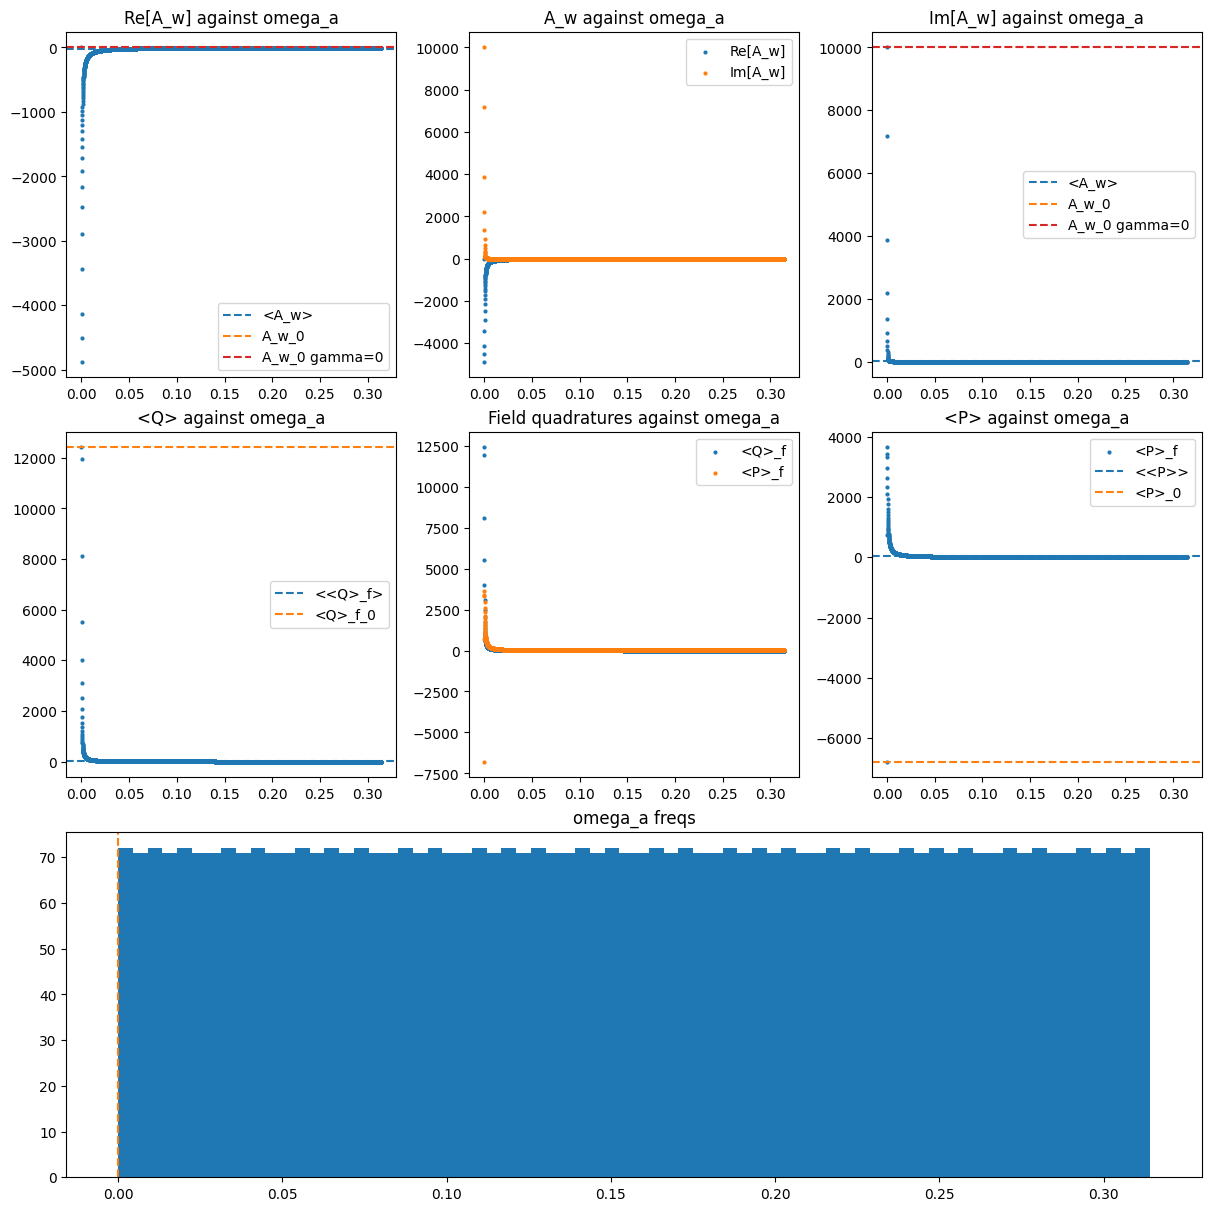

In [26]:
# Across all omega_as
omega_a_samples = np.int64(5e3)

params['omega_as'] = np.linspace(0, 0.1 * np.pi, omega_a_samples)
params['omega_a_0'] = 0 * np.pi
params['t'] = 1
params['omega_f'] = 1
params['tau'] = 0
params['gamma'] = 0
params['g'] = 1

results = wv_pipeline(params)
plot_fixed_results(results)

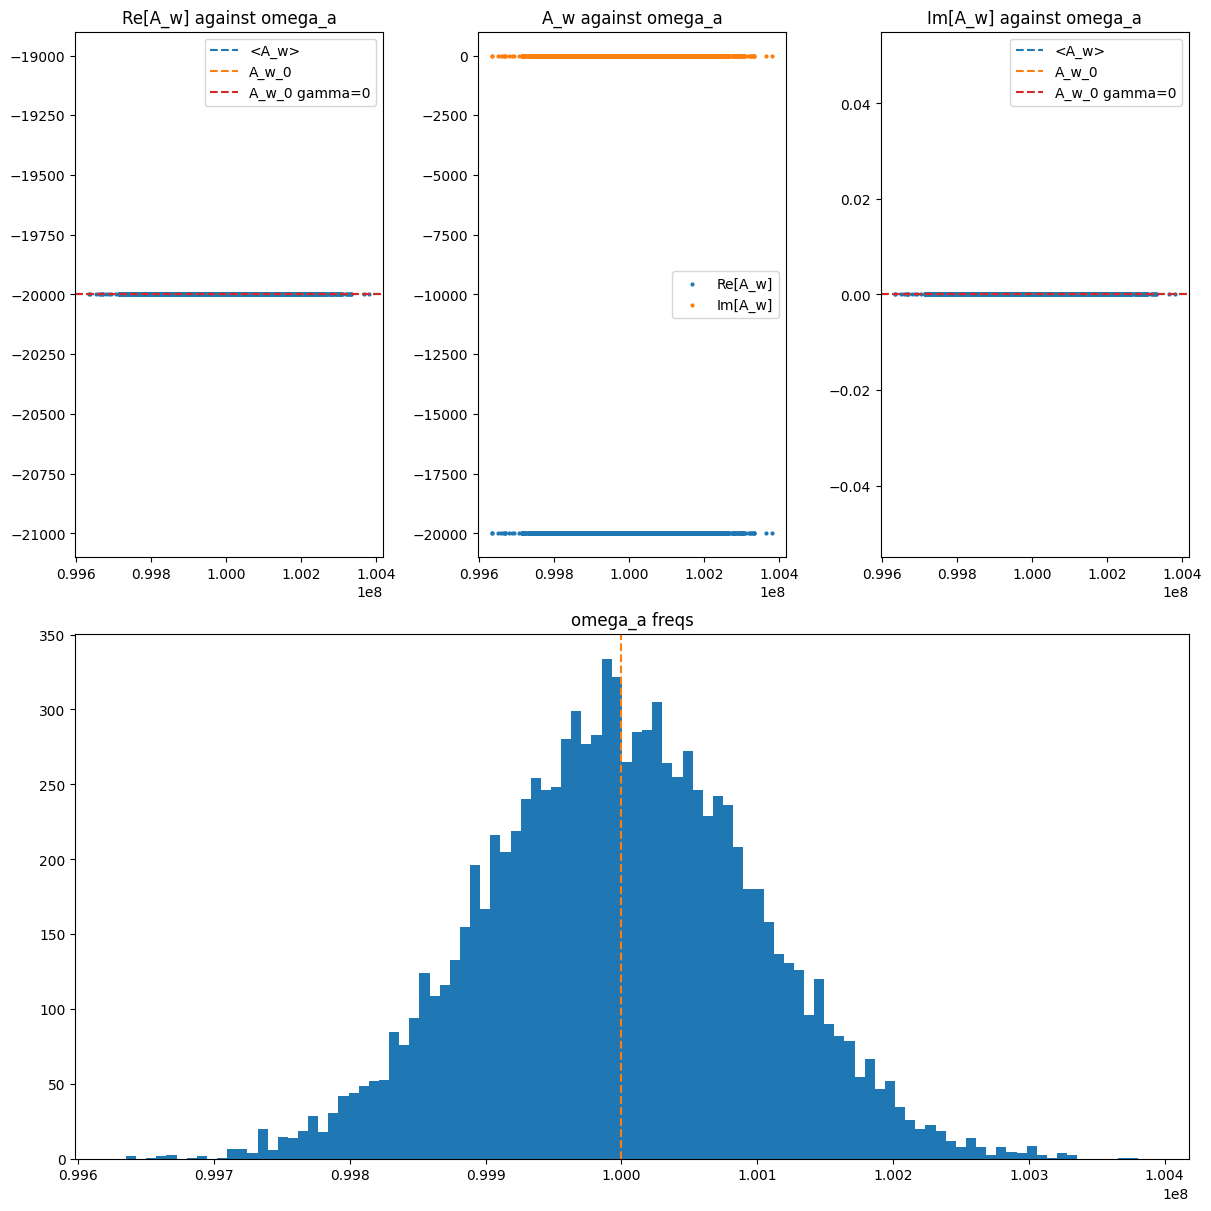

In [10]:
# Gaussian disorder, tau ~ sigma >> t
delta = 1e-4
params['i'] = np.array([-np.sin(delta), 0, np.cos(delta)])
params['f'] = np.array([0,0,-1])

samples = 10000
omega_a_mean = 1e8
omega_a_std = 1e5
params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, samples)
params['omega_a_0'] = omega_a_mean
params['t'] = 1e-9
params['tau'] = 1e5
params['gamma'] = 0
params['omega_f'] = 1e9
params['g'] = 1e6

results = wv_pipeline(params, False)
plot_fixed_results(results)

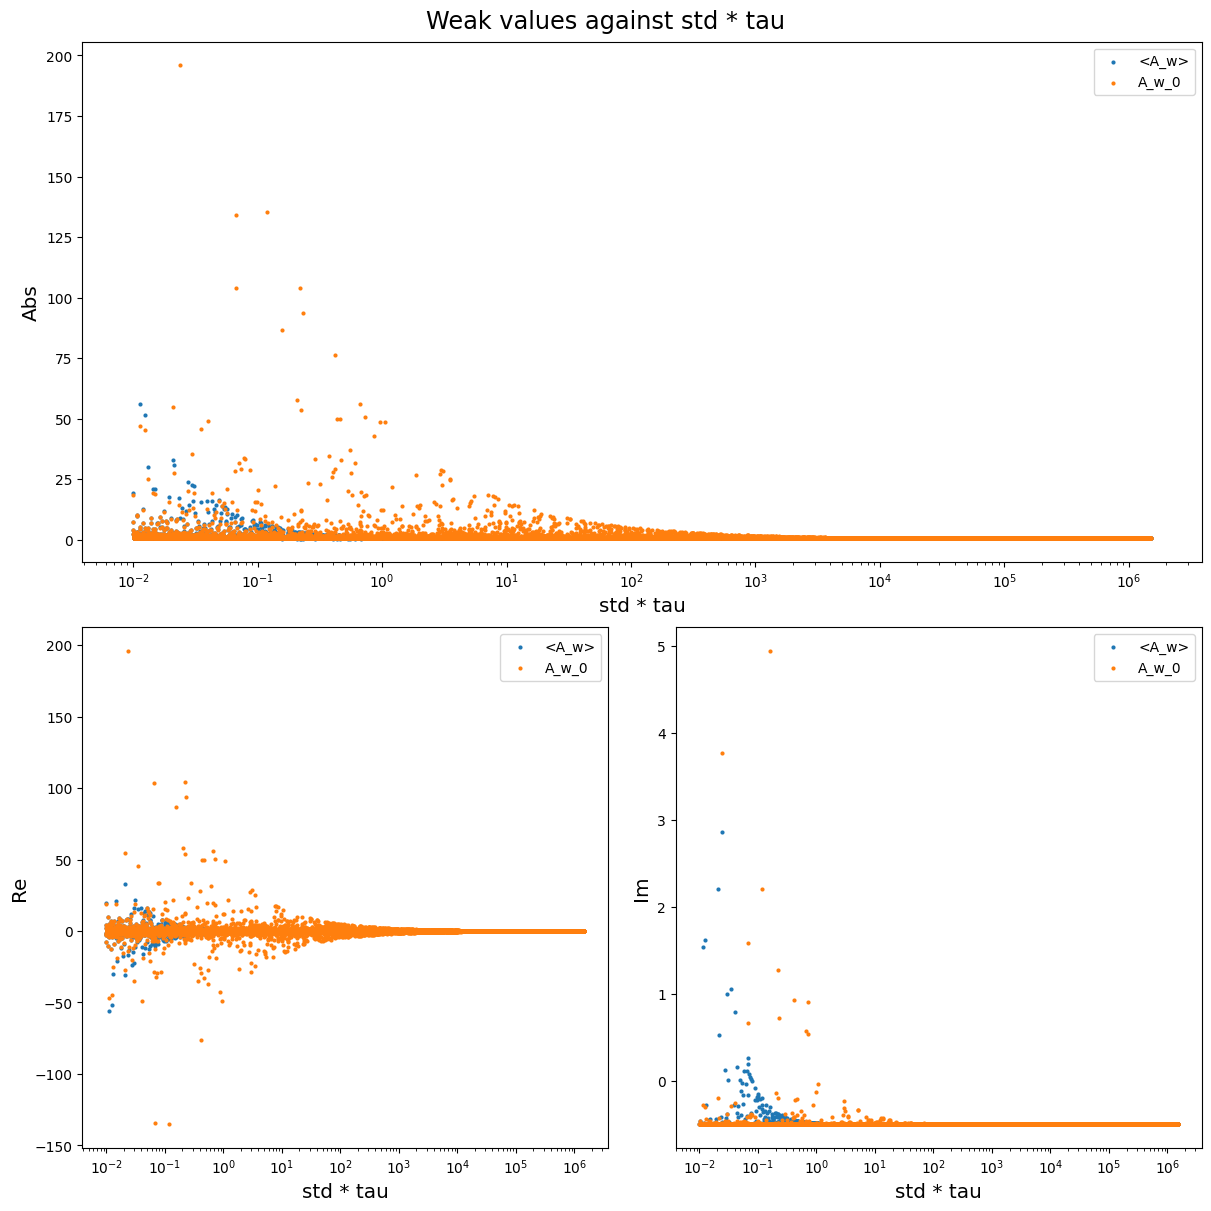

In [8]:
# Gaussian disorder, neg WV, omega_a >> std, 4/std >= tau >= 0.1/std >> t
omega_a_samples = np.int64(1e4)
tau_samples = np.int64(1e4)

omega_a_mean = 1e8
omega_a_std = 1e4

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, omega_a_samples)
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.geomspace(1e-6, 1.5e2, tau_samples)
params['gamma'] = 1
params['omega_f'] = 9.9999999e7
params['g'] = 1e6


results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, False, True, True)